<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/NGC_6822/blob/main/X_Match/NGC6822_X_Match.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!git clone https://github.com/Mahdi-Abdollahii/NGC_6822.git

fatal: destination path 'NGC_6822' already exists and is not an empty directory.


In [10]:
!git clone https://github.com/Mahdi-Abdollahii/AstroDC.git

fatal: destination path 'AstroDC' already exists and is not an empty directory.


In [11]:
pip install git+https://github.com/Mahdi-Abdollahii/AstroDC.git

  Cloning https://github.com/Mahdi-Abdollahii/AstroDC.git to /tmp/pip-req-build-sqxmh01x
  Running command git clone --filter=blob:none --quiet https://github.com/Mahdi-Abdollahii/AstroDC.git /tmp/pip-req-build-sqxmh01x
  Resolved https://github.com/Mahdi-Abdollahii/AstroDC.git to commit 8316e67aa8d5f03931b6aa7743d9d8db596366f4
  Preparing metadata (setup.py) ... done


In [12]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from AstroDC import AstroDC

# X_cross match writen by me

In [ ]:
def cord_list(SkyCoord_output) :
  list_cor_deg = list(SkyCoord_output)
  Ra_deg_list = []
  Dec_deg_list = []
  for i in list_cor_deg :
    Ra_deg_list.append(float(str(i).split('deg\n')[1].split('(')[1].split(')')[0].split(',')[0]))
    Dec_deg_list.append(float(str(i).split('deg\n')[1].split('(')[1].split(')')[0].split(',')[1].split()[0]))
  return Ra_deg_list, Dec_deg_list


In [ ]:
def X_match( Main_catalog , second_catalog , Ra_Main , De_Main , Ra_second , De_second):

  Main_cat_Coord = SkyCoord(Main_catalog[Ra_Main], Main_catalog[De_Main], unit=(u.hourangle, u.deg))
  Scnd_cat_Coord = SkyCoord(second_catalog[Ra_second], second_catalog[De_second], unit=(u.hourangle, u.deg))

  Ra_main, De_main = cord_list(Main_cat_Coord)
  Ra_scnd, De_scnd = cord_list(Scnd_cat_Coord)

  Ra_array = np.zeros([len(Ra_main),len(Ra_scnd)])
  De_array = np.zeros([len(De_main),len(De_scnd)])
  final_array = np.zeros([len(De_main),len(De_scnd)]) + 10

  for i in range(len(Ra_main)):
    for j in range(len(Ra_scnd)):
      Ra_array[i,j] = (Ra_main[i] - Ra_scnd[j]) * 3600
      De_array[i,j] = (De_main[i] - De_scnd[j]) * 3600

  l=0
  for i in range(len(Ra_main)):
    for j in range(len(Ra_scnd)):
      if np.abs(Ra_array[i,j]) < 1 :
        if np.abs(De_array[i,j]) < 1 :
          final_array[i,j] = (Ra_array[i,j]**2 + De_array[i,j]**2)**0.5
          if final_array[i,j] < 1 :
            l = l + 1

  print( str(l) + ' stars are same in both catalog')


# Data

Making Df for each datasets : Sibbond , Kacharov , Demers

In [13]:
AstroDC.Vizier_XMLCSV_to_CSV("/content/NGC_6822/Catolgues/Demers 20006.tsv", "Demers_2006")
Demers_2006 = pd.read_csv ("/content/Demers_2006.csv")
AstroDC.Vizier_XMLCSV_to_CSV("/content/NGC_6822/Catolgues/Kacharov.tsv", "Kacharov")
Kacharov = pd.read_csv ("/content/Kacharov.csv")
AstroDC.Vizier_XMLCSV_to_CSV("/content/NGC_6822/Catolgues/Sibbons 2015.tsv", "Sibbons_2015")
Sibbons_2015 = pd.read_csv ("/content/Sibbons_2015.csv")

Demers_2006.csv file of this data saved in local directory.
Kacharov.csv file of this data saved in local directory.
Sibbons_2015.csv file of this data saved in local directory.


Whitlock

In [14]:
Whitelock = pd.read_csv("/content/NGC_6822/Catolgues/Whitelock.csv")
Whitelock

,Mid,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,eJ,H,eH,Ks,eKs,Types
0,1,10870,296.17892,-14.82286,17.52,0.04,16.53,0.04,16.19,0.05,S
1,2,10784,296.21545,-14.83469,17.45,0.03,16.53,0.04,16.20,0.06,S
2,3,11004,296.27341,-14.80861,17.60,0.03,16.62,0.03,16.27,0.05,S
3,4,11029,296.28308,-14.80497,17.46,0.03,16.55,0.02,16.22,0.05,S
4,5,12050,296.25427,-14.81764,18.17,0.07,17.25,0.10,16.70,0.05,S
...,...,...,...,...,...,...,...,...,...,...,...
93,94,40363,296.23649,-14.85697,19.18,NaN,17.73,NaN,16.32,NaN,C
94,95,10032,296.22696,-14.80191,14.48,NaN,13.66,NaN,13.34,NaN,s
95,96,10074,296.24005,-14.80796,14.74,NaN,13.94,NaN,13.66,NaN,s
96,97,20022,296.20816,-14.72616,14.09,NaN,13.21,NaN,12.83,NaN,s


# Making Reg file


In [15]:
Sibbons_2015

,Tab( ),Reg( ),f_ID( ),ID( ),n_ID( ),RAJ2000(deg),DEJ2000(deg),Jmag(mag),Hmag(mag),Kmag(mag),...,spT( ),spTK( ),spTD( ),[LDB2002]( ),R-I(mag),CN-TiO(mag),S/N( ),PapI( ),SimbadName( ),recno()
0,4.0,i,,173834.0,,296.222870,-14.710180,17.6,16.76,16.37,...,Ce,C,C,390.0,1.338,0.503,12.0,PapI,[SRC2012] 296.222870-14.710189,1.0
1,4.0,i,,176619.0,,296.228880,-14.720120,17.5,16.56,16.3,...,Ce,C3.2,C,431.0,1.316,0.405,14.0,PapI,[SRC2012] 296.228973-14.720121,2.0
2,4.0,i,,179746.0,,296.220330,-14.728410,18.26,17.25,17.15,...,Ce,C3.2,S,370.0,1.265,0.404,11.0,PapI,[SRC2012] 296.220337-14.728414,3.0
3,4.0,i,,181364.0,,296.127380,-14.733690,17.56,16.81,16.41,...,Ce,C8.2e,C,96.0,1.171,0.311,12.0,PapI,[SRC2012] 296.127411-14.733698,4.0
4,4.0,i,,182253.0,,296.310880,-14.736450,17.18,16.31,15.91,...,Ce,C,C,769.0,1.226,0.661,11.0,PapI,[LDB2002] 769,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,12.0,o,,302586.0,,297.015076,-15.255167,18.22,17.49,17.35,...,dM,dM2,M1.5V,,,,7.0,PapI,[SRC2012] 297.015076-15.255167,201.0
201,12.0,o,,303607.0,,295.810150,-15.260356,18.27,17.55,17.34,...,dM,K7III,K4III,,,,7.0,PapI,[SRC2012] 295.810150-15.260356,202.0
202,12.0,o,,334393.0,,296.061401,-15.403897,17.71,16.95,16.74,...,dM,dM3.5,M3V,,,,8.0,PapI,[SRC2012] 296.061401-15.403897,203.0
203,12.0,o,,337831.0,,295.923065,-15.421967,18.42,17.67,17.39,...,dK,dK7,K0IV,,,,10.0,PapI,[SRC2012] 295.923065-15.421967,204.0


In [16]:
AstroDC.Reg_file( Whitelock , 'Ra(J2000) deg', 'Dec(J2000) deg', Units = u.deg , File_name='Whitelock' , Color = "red" )
AstroDC.Reg_file( Demers_2006 , 'RAJ2000("h:m:s")', 'DEJ2000("d:m:s")', Units = u.hourangle , File_name='Demers_2006' , Color= 'cyan' )
AstroDC.Reg_file( Kacharov , 'RAJ2000(deg)', 'DEJ2000(deg)', Units = u.deg , File_name='Kacharov' , Color = "yellow" )
AstroDC.Reg_file( Sibbons_2015 , 'RAJ2000(deg)', 'DEJ2000(deg)', Units = u.deg , File_name='Sibbons_2015' , Color = "green"  )

Whitelock.reg file of this data saved in local directory.
Demers_2006.reg file of this data saved in local directory.
Kacharov.reg file of this data saved in local directory.
Sibbons_2015.reg file of this data saved in local directory.


#X_Match

##Whtelock with Sibbons

In [17]:
Main_cat = Whitelock
Scnd_cat = Sibbons_2015

In [18]:
Main_cat

,Mid,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,eJ,H,eH,Ks,eKs,Types
0,1,10870,296.17892,-14.82286,17.52,0.04,16.53,0.04,16.19,0.05,S
1,2,10784,296.21545,-14.83469,17.45,0.03,16.53,0.04,16.20,0.06,S
2,3,11004,296.27341,-14.80861,17.60,0.03,16.62,0.03,16.27,0.05,S
3,4,11029,296.28308,-14.80497,17.46,0.03,16.55,0.02,16.22,0.05,S
4,5,12050,296.25427,-14.81764,18.17,0.07,17.25,0.10,16.70,0.05,S
...,...,...,...,...,...,...,...,...,...,...,...
93,94,40363,296.23649,-14.85697,19.18,NaN,17.73,NaN,16.32,NaN,C
94,95,10032,296.22696,-14.80191,14.48,NaN,13.66,NaN,13.34,NaN,s
95,96,10074,296.24005,-14.80796,14.74,NaN,13.94,NaN,13.66,NaN,s
96,97,20022,296.20816,-14.72616,14.09,NaN,13.21,NaN,12.83,NaN,s


In [19]:
Scnd_cat

,Tab( ),Reg( ),f_ID( ),ID( ),n_ID( ),RAJ2000(deg),DEJ2000(deg),Jmag(mag),Hmag(mag),Kmag(mag),...,spT( ),spTK( ),spTD( ),[LDB2002]( ),R-I(mag),CN-TiO(mag),S/N( ),PapI( ),SimbadName( ),recno()
0,4.0,i,,173834.0,,296.222870,-14.710180,17.6,16.76,16.37,...,Ce,C,C,390.0,1.338,0.503,12.0,PapI,[SRC2012] 296.222870-14.710189,1.0
1,4.0,i,,176619.0,,296.228880,-14.720120,17.5,16.56,16.3,...,Ce,C3.2,C,431.0,1.316,0.405,14.0,PapI,[SRC2012] 296.228973-14.720121,2.0
2,4.0,i,,179746.0,,296.220330,-14.728410,18.26,17.25,17.15,...,Ce,C3.2,S,370.0,1.265,0.404,11.0,PapI,[SRC2012] 296.220337-14.728414,3.0
3,4.0,i,,181364.0,,296.127380,-14.733690,17.56,16.81,16.41,...,Ce,C8.2e,C,96.0,1.171,0.311,12.0,PapI,[SRC2012] 296.127411-14.733698,4.0
4,4.0,i,,182253.0,,296.310880,-14.736450,17.18,16.31,15.91,...,Ce,C,C,769.0,1.226,0.661,11.0,PapI,[LDB2002] 769,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,12.0,o,,302586.0,,297.015076,-15.255167,18.22,17.49,17.35,...,dM,dM2,M1.5V,,,,7.0,PapI,[SRC2012] 297.015076-15.255167,201.0
201,12.0,o,,303607.0,,295.810150,-15.260356,18.27,17.55,17.34,...,dM,K7III,K4III,,,,7.0,PapI,[SRC2012] 295.810150-15.260356,202.0
202,12.0,o,,334393.0,,296.061401,-15.403897,17.71,16.95,16.74,...,dM,dM3.5,M3V,,,,8.0,PapI,[SRC2012] 296.061401-15.403897,203.0
203,12.0,o,,337831.0,,295.923065,-15.421967,18.42,17.67,17.39,...,dK,dK7,K0IV,,,,10.0,PapI,[SRC2012] 295.923065-15.421967,204.0


In [20]:
Main_cat_Coord = SkyCoord(Main_cat['Ra(J2000) deg'], Main_cat['Dec(J2000) deg'], unit=(u.deg, u.deg))
Scnd_cat_Coord = SkyCoord(Scnd_cat['RAJ2000(deg)'], Scnd_cat['DEJ2000(deg)'], unit=(u.deg, u.deg))

In [21]:
idx, d2D, d3D = Scnd_cat_Coord.match_to_catalog_sky(Main_cat_Coord)

In [22]:
max_sep = 1.0 * u.arcsec        # Maximum erorr
i_OK = d2D < max_sep

In [23]:
Secondary_catalog = Scnd_cat[i_OK]
Main_catalog = Main_cat.iloc[idx[i_OK]]

In [24]:
Main_catalog = Main_catalog.reset_index()
Secondary_catalog = Secondary_catalog.reset_index()

X_data = pd.concat([Main_catalog, Secondary_catalog], axis=1)

In [25]:
X_data

,index,Mid,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,eJ,H,eH,Ks,...,spT( ),spTK( ),spTD( ),[LDB2002]( ),R-I(mag),CN-TiO(mag),S/N( ),PapI( ),SimbadName( ),recno()


In [26]:
X_data.to_csv("X_Catalog.csv")

##Whtelock_sibbons with Demer

In [27]:
Whitelock_sibbons = pd.read_csv("/content/NGC_6822/Catolgues/Whitelock_sibbons.csv")
Whitelock_sibbons

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,eJ,H,eH,Ks,eKs,Types
0,10870.0,296.178920,-14.822860,17.52,0.04,16.53,0.04,16.19,0.05,S
1,10784.0,296.215450,-14.834690,17.45,0.03,16.53,0.04,16.2,0.06,S
2,11004.0,296.273410,-14.808610,17.6,0.03,16.62,0.03,16.27,0.05,S
3,11029.0,296.283080,-14.804970,17.46,0.03,16.55,0.02,16.22,0.05,S
4,12050.0,296.254270,-14.817640,18.17,0.07,17.25,0.10,16.7,0.05,S
...,...,...,...,...,...,...,...,...,...,...
298,NaN,297.015076,-15.255167,18.22,NaN,17.49,NaN,17.35,NaN,dM
299,NaN,295.810150,-15.260356,18.27,NaN,17.55,NaN,17.34,NaN,dM
300,NaN,296.061401,-15.403897,17.71,NaN,16.95,NaN,16.74,NaN,dM
301,NaN,295.923065,-15.421967,18.42,NaN,17.67,NaN,17.39,NaN,dK


In [28]:
Main_cat = Whitelock_sibbons
Scnd_cat = Demers_2006

In [29]:
Main_cat

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,eJ,H,eH,Ks,eKs,Types
0,10870.0,296.178920,-14.822860,17.52,0.04,16.53,0.04,16.19,0.05,S
1,10784.0,296.215450,-14.834690,17.45,0.03,16.53,0.04,16.2,0.06,S
2,11004.0,296.273410,-14.808610,17.6,0.03,16.62,0.03,16.27,0.05,S
3,11029.0,296.283080,-14.804970,17.46,0.03,16.55,0.02,16.22,0.05,S
4,12050.0,296.254270,-14.817640,18.17,0.07,17.25,0.10,16.7,0.05,S
...,...,...,...,...,...,...,...,...,...,...
298,NaN,297.015076,-15.255167,18.22,NaN,17.49,NaN,17.35,NaN,dM
299,NaN,295.810150,-15.260356,18.27,NaN,17.55,NaN,17.34,NaN,dM
300,NaN,296.061401,-15.403897,17.71,NaN,16.95,NaN,16.74,NaN,dM
301,NaN,295.923065,-15.421967,18.42,NaN,17.67,NaN,17.39,NaN,dK


In [30]:
Scnd_cat

,SpType( ),[DBA2006]( ),[LDB2002]( ),"RAJ2000(""h:m:s"")","DEJ2000(""d:m:s"")",Ksmag( ),J-Ks( ),e_J-Ks()
0,,1001.0,,19 42 38.66,-14 50 40.7,16.379,1.782,0.089
1,,1002.0,,19 42 43.66,-14 54 35.0,16.615,1.666,0.084
2,,1003.0,,19 42 45.52,-14 53 54.2,16.540,1.720,0.093
3,,1004.0,,19 42 48.95,-15 01 15.4,16.191,2.076,0.097
4,,1005.0,,19 42 50.17,-15 03 22.0,16.427,1.636,0.087
...,...,...,...,...,...,...,...,...
137,,1138.0,,19 47 24.79,-14 23 36.3,16.223,1.688,0.082
138,,1139.0,,19 47 27.78,-14 26 29.1,15.650,1.695,0.090
139,,1140.0,,19 47 36.02,-14 25 49.3,16.150,1.701,0.116
140,,1141.0,,19 47 36.32,-14 25 19.9,15.914,1.521,0.084


In [31]:
Main_cat_Coord = SkyCoord(Main_cat['Ra(J2000) deg'], Main_cat['Dec(J2000) deg'], unit=(u.deg, u.deg))
Scnd_cat_Coord = SkyCoord(Scnd_cat['RAJ2000("h:m:s")'], Scnd_cat['DEJ2000("d:m:s")'], unit=(u.hourangle, u.deg))

In [32]:
idx, d2D, d3D = Scnd_cat_Coord.match_to_catalog_sky(Main_cat_Coord)

In [33]:
max_sep = 1.0 * u.arcsec        # Maximum erorr
i_OK = d2D < max_sep

In [34]:
Secondary_catalog = Scnd_cat[i_OK]
Main_catalog = Main_cat.iloc[idx[i_OK]]

In [35]:
Main_catalog = Main_catalog.reset_index()
Secondary_catalog = Secondary_catalog.reset_index()

X_data = pd.concat([Main_catalog, Secondary_catalog], axis=1)

In [36]:
X_data

,index,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,eJ,H,eH,Ks,eKs,Types,index,SpType( ),[DBA2006]( ),[LDB2002]( ),"RAJ2000(""h:m:s"")","DEJ2000(""d:m:s"")",Ksmag( ),J-Ks( ),e_J-Ks()
0,229,NaN,295.720520,-15.125569,17.63,NaN,16.68,NaN,16.07,NaN,C:,5,,1006.0,,19 42 52.92,-15 07 32.0,16.229,1.543,0.081
1,289,NaN,295.969788,-14.975070,17.69,NaN,16.93,NaN,16.6,NaN,C,19,C,1020.0,5.0,19 43 52.76,-14 58 30.3,16.508,1.603,0.093
2,271,NaN,295.977081,-14.726664,17.58,NaN,16.77,NaN,16.22,NaN,C,22,C,1023.0,7.0,19 43 54.49,-14 43 35.7,16.188,1.733,0.079
3,281,NaN,296.066071,-14.844581,17.44,NaN,16.78,NaN,16.3,NaN,C,45,C,1046.0,34.0,19 44 15.86,-14 50 40.3,15.862,1.547,0.066
4,142,NaN,296.084503,-14.832314,17.5,NaN,16.6,NaN,16.15,NaN,C:,55,C,1056.0,50.0,19 44 20.30,-14 49 56.4,16.056,1.701,0.081
5,272,NaN,296.087860,-14.740214,17.23,NaN,18.14,NaN,15.9,NaN,C,58,C,1059.0,53.0,19 44 21.10,-14 44 24.7,15.697,1.571,0.065
6,141,NaN,296.129822,-14.832311,17.56,NaN,16.74,NaN,16.49,NaN,C,83,C,1084.0,99.0,19 44 31.14,-14 49 56.4,16.348,1.540,0.094
7,129,NaN,296.131714,-14.759347,17.37,NaN,16.47,NaN,16.18,NaN,Ce,86,C,1087.0,100.0,19 44 31.59,-14 45 33.7,16.099,1.674,0.082
8,285,NaN,296.368011,-14.913227,16.96,NaN,15.87,NaN,15.15,NaN,C,88,C,1089.0,839.0,19 45 28.35,-14 54 47.3,15.301,1.851,0.057
9,265,NaN,296.539612,-14.704988,17.59,NaN,16.48,NaN,15.73,NaN,C,115,C,1116.0,900.0,19 46 09.51,-14 42 18.0,16.007,1.931,0.069


##Whtelock_sibbons_Demer with **kacharoov**

In [37]:
Whitelock_sibbons_Demer = pd.read_csv("/content/NGC_6822/Catolgues/Whitelock_sibbons_demers.csv")
Whitelock_sibbons_Demer

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,eJ,H,eH,Ks,eKs,Types
0,10870.0,296.17892,-14.82286,17.52,0.04,16.53,0.04,16.19,0.05,S
1,10784.0,296.21545,-14.83469,17.45,0.03,16.53,0.04,16.2,0.06,S
2,11004.0,296.27341,-14.80861,17.6,0.03,16.62,0.03,16.27,0.05,S
3,11029.0,296.28308,-14.80497,17.46,0.03,16.55,0.02,16.22,0.05,S
4,12050.0,296.25427,-14.81764,18.17,0.07,17.25,0.10,16.7,0.05,S
...,...,...,...,...,...,...,...,...,...,...
430,NaN,296.85330,-14.39340,17.91,NaN,0,NaN,16.22,NaN,
431,NaN,296.86580,-14.44140,17.35,NaN,0,NaN,15.65,NaN,
432,NaN,296.90010,-14.43040,17.85,NaN,0,NaN,16.15,NaN,
433,NaN,296.90130,-14.42220,17.44,NaN,0,NaN,15.91,NaN,


In [38]:
Main_cat = Whitelock_sibbons_Demer
Scnd_cat = pd.read_csv("/content/Kacharov.csv")

In [39]:
Main_cat

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,eJ,H,eH,Ks,eKs,Types
0,10870.0,296.17892,-14.82286,17.52,0.04,16.53,0.04,16.19,0.05,S
1,10784.0,296.21545,-14.83469,17.45,0.03,16.53,0.04,16.2,0.06,S
2,11004.0,296.27341,-14.80861,17.6,0.03,16.62,0.03,16.27,0.05,S
3,11029.0,296.28308,-14.80497,17.46,0.03,16.55,0.02,16.22,0.05,S
4,12050.0,296.25427,-14.81764,18.17,0.07,17.25,0.10,16.7,0.05,S
...,...,...,...,...,...,...,...,...,...,...
430,NaN,296.85330,-14.39340,17.91,NaN,0,NaN,16.22,NaN,
431,NaN,296.86580,-14.44140,17.35,NaN,0,NaN,15.65,NaN,
432,NaN,296.90010,-14.43040,17.85,NaN,0,NaN,16.15,NaN,
433,NaN,296.90130,-14.42220,17.44,NaN,0,NaN,15.91,NaN,


In [40]:
Scnd_cat

,Sp( ),Seq( ),RAJ2000(deg),DEJ2000(deg),Dist(deg),Rmag(mag),Jmag(mag),Hmag(mag),Kmag(mag),SpTph( ),SpType( ),q_SpType( ),Nsp( ),Simbad()
0,sp,94208.0,296.349976,-14.828187,0.112153,19.772,17.877,17.045,16.898,M,M1III,4.0,1.0,Simbad
1,sp,94979.0,296.357117,-14.834526,0.120605,19.509,17.528,16.720,16.515,Mca,M1III,4.0,1.0,Simbad
2,sp,96968.0,296.337067,-14.850516,0.107354,18.978,16.924,16.080,15.693,C,C5.5,5.0,2.0,Simbad
3,sp,97590.0,296.354126,-14.855531,0.124920,19.406,17.334,16.521,16.218,M,C5.5,5.0,1.0,Simbad
4,sp,98478.0,296.306183,-14.863027,0.088624,23.062,17.451,16.284,15.489,C,--,4.0,1.0,Simbad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,sp,125420.0,295.464996,-15.146566,0.848109,19.330,17.472,16.739,16.559,M,dM0,5.0,1.0,Simbad
542,sp,130615.0,295.434204,-15.201089,0.899106,19.391,16.736,16.063,15.827,M,--,4.0,1.0,Simbad
543,sp,131365.0,295.503571,-15.209061,0.841269,18.599,18.138,17.388,17.182,M,dM0,5.0,1.0,Simbad
544,sp,137212.0,295.485199,-15.273877,0.889908,19.066,17.789,16.997,16.800,M,K7III,4.0,1.0,Simbad


In [41]:
Main_cat_Coord = SkyCoord(Main_cat['Ra(J2000) deg'], Main_cat['Dec(J2000) deg'], unit=(u.deg, u.deg))
Scnd_cat_Coord = SkyCoord(Scnd_cat['RAJ2000(deg)'], Scnd_cat['DEJ2000(deg)'], unit=(u.deg, u.deg))

In [42]:
idx, d2D, d3D = Scnd_cat_Coord.match_to_catalog_sky(Main_cat_Coord)

In [43]:
max_sep = 1.0 * u.arcsec        # Maximum erorr
i_OK = d2D < max_sep

In [44]:
Secondary_catalog = Scnd_cat[i_OK]
Main_catalog = Main_cat.iloc[idx[i_OK]]

In [45]:
Main_catalog = Main_catalog.reset_index()
Secondary_catalog = Secondary_catalog.reset_index()

X_data = pd.concat([Main_catalog, Secondary_catalog], axis=1)

In [46]:
X_data

,index,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,eJ,H,eH,Ks,eKs,...,Dist(deg),Rmag(mag),Jmag(mag),Hmag(mag),Kmag(mag),SpTph( ),SpType( ),q_SpType( ),Nsp( ),Simbad()
0,384,NaN,296.369500,-14.872900,17.16,NaN,0,NaN,15.45,NaN,...,0.146467,20.196,17.025,15.971,15.317,C,C6.5,5.0,1.0,Simbad
1,119,NaN,296.179413,-14.688039,17.24,NaN,16.35,NaN,16.08,NaN,...,0.130633,19.813,17.241,16.350,16.076,M,C5.5,5.0,1.0,Simbad
2,40,40139.0,296.204280,-14.742710,15.25,NaN,14.32,NaN,13.92,NaN,...,0.070859,18.691,15.048,14.173,13.874,M,M6III,6.0,1.0,Simbad
3,273,NaN,296.171387,-14.745203,18.02,NaN,17.23,NaN,16.97,NaN,...,0.090533,20.500,18.020,17.228,16.970,M,C5.5,5.0,1.0,Simbad
4,0,10870.0,296.178920,-14.822860,17.52,0.04,16.53,0.04,16.19,0.05,...,0.064700,20.139,17.330,16.475,16.210,M,SIII,5.0,1.0,Simbad
5,371,NaN,296.116000,-14.881100,17.72,NaN,0,NaN,15.64,NaN,...,0.146717,20.608,17.310,16.250,15.450,C,C5.5,6.0,1.0,Simbad
6,357,NaN,296.092800,-14.892200,17.85,NaN,0,NaN,15.69,NaN,...,0.172413,20.724,17.214,16.157,15.608,C,C6.5,5.0,1.0,Simbad
7,284,NaN,296.207458,-14.896397,17.39,NaN,16.58,NaN,16.2,NaN,...,0.098695,20.202,17.393,16.583,16.197,C,C5.5,5.0,1.0,Simbad
8,153,NaN,296.118591,-14.898730,16.89,NaN,16.03,NaN,15.73,NaN,...,0.154809,19.469,16.894,16.034,15.732,M,C5.5,6.0,1.0,Simbad
9,382,NaN,296.365800,-14.852500,17.51,NaN,0,NaN,15.84,NaN,...,0.134490,19.955,17.293,16.259,15.570,C,C5.5,6.0,1.0,Simbad


# Final Data

In [47]:
ALL_data = pd.read_csv('/content/NGC_6822/Data/ALL_Raw_Data.csv')
ALL_data

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,eJ,H,eH,Ks,eKs,Types,Catalog
0,10870.0,296.178920,-14.822860,17.52,0.04,16.53,0.04,16.19,0.05,S,Whitelock
1,10784.0,296.215450,-14.834690,17.45,0.03,16.53,0.04,16.2,0.06,S,Whitelock
2,11004.0,296.273410,-14.808610,17.6,0.03,16.62,0.03,16.27,0.05,S,Whitelock
3,11029.0,296.283080,-14.804970,17.46,0.03,16.55,0.02,16.22,0.05,S,Whitelock
4,12050.0,296.254270,-14.817640,18.17,0.07,17.25,0.10,16.7,0.05,S,Whitelock
...,...,...,...,...,...,...,...,...,...,...,...
937,NaN,295.464996,-15.146566,17.472,NaN,16.739,NaN,16.559,NaN,M,Kacharov
938,NaN,295.434204,-15.201089,16.736,NaN,16.063,NaN,15.827,NaN,M,Kacharov
939,NaN,295.503571,-15.209061,18.138,NaN,17.388,NaN,17.182,NaN,M,Kacharov
940,NaN,295.485199,-15.273877,17.789,NaN,16.997,NaN,16.8,NaN,M,Kacharov


(array([ 98.,   0.,   0., 205.,   0.,   0., 132.,   0.,   0., 507.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

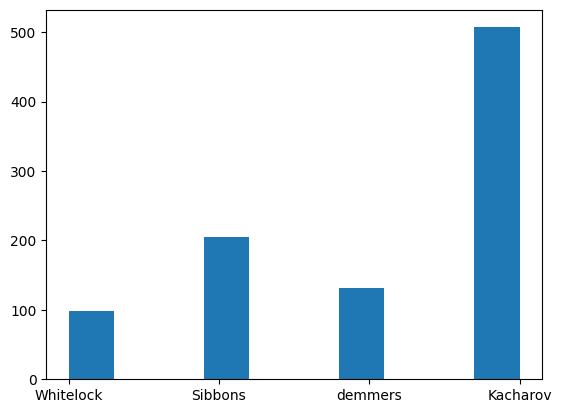

In [48]:
plt.hist(ALL_data['Catalog'])

In [49]:
final_cleaned_data_v2 = pd.read_csv('/content/NGC_6822/Data/final_cleaned_data_v2.csv')
final_cleaned_data_v2

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,eJ,H,eH,Ks,eKs,Types,DCG,Catalog
0,10870.0,296.178920,-14.822860,17.520,0.04,16.53,0.04,16.190,0.05,S,0.055301,Whitelock
1,10784.0,296.215450,-14.834690,17.450,0.03,16.53,0.04,16.200,0.06,S,0.036084,Whitelock
2,11004.0,296.273410,-14.808610,17.600,0.03,16.62,0.03,16.270,0.05,S,0.043961,Whitelock
3,11029.0,296.283080,-14.804970,17.460,0.03,16.55,0.02,16.220,0.05,S,0.053182,Whitelock
4,12050.0,296.254270,-14.817640,18.170,0.07,17.25,0.10,16.700,0.05,S,0.029053,Whitelock
...,...,...,...,...,...,...,...,...,...,...,...,...
373,NaN,296.187256,-14.854028,18.166,NaN,17.224,NaN,16.937,NaN,C,0.067590,Kacharov
374,NaN,296.227081,-14.876891,17.543,NaN,16.457,NaN,15.858,NaN,C,0.075278,Kacharov
375,NaN,296.226807,-14.881382,17.365,NaN,16.369,NaN,15.908,NaN,C,0.079776,Kacharov
376,NaN,295.976105,-14.796489,18.250,NaN,17.411,NaN,17.052,NaN,C,0.253948,Kacharov


(array([ 98.,   0.,   0., 105.,   0.,   0.,  57.,   0.,   0., 118.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

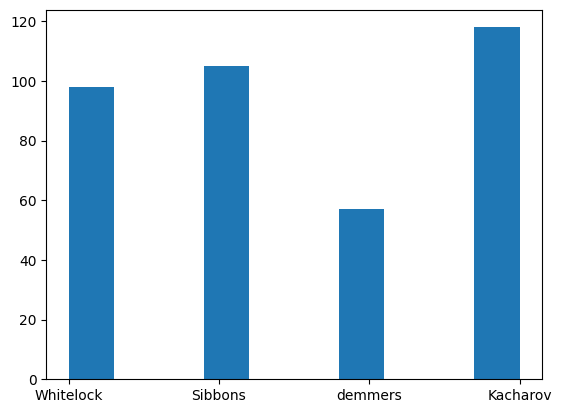

In [50]:
plt.hist(final_cleaned_data_v2['Catalog'])

(array([  7.,  27.,   0.,  11.,   0., 256.,  38.,   0.,   4.,  35.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

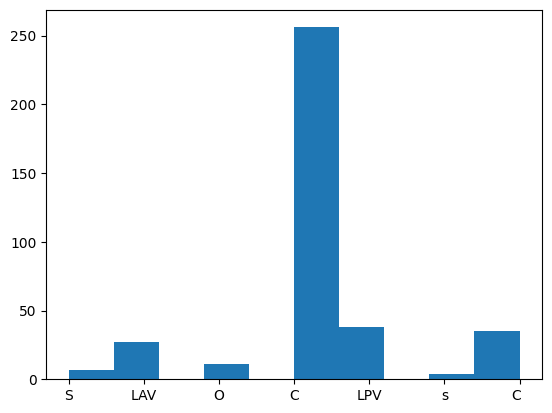

In [51]:
plt.hist(final_cleaned_data_v2['Types'])